In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd


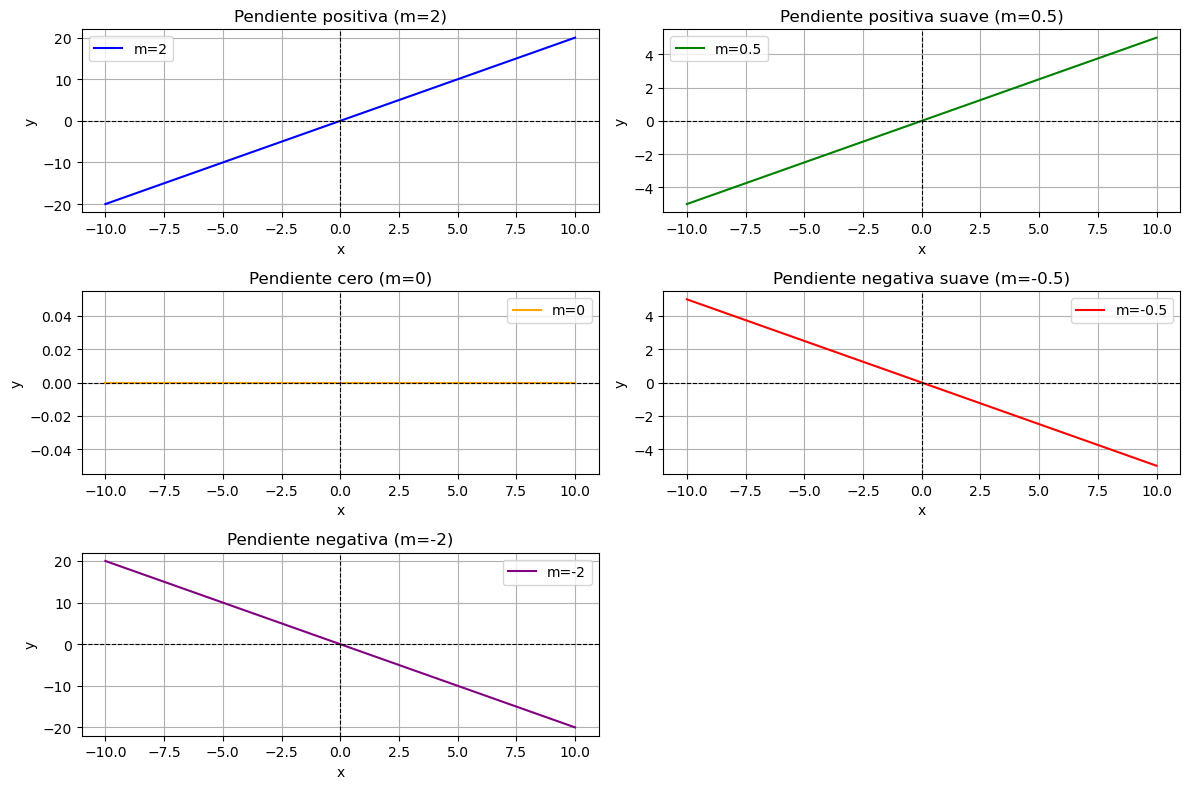

In [28]:
# Configurar las pendientes y colores para los ejemplos
pendientes = [2, 0.5, 0, -0.5, -2]  # Distintas pendientes
intercepto = 0  # Punto de intersección en y = 0
x = np.linspace(-10, 10, 100)  # Valores de x para graficar

# Crear subgráficos para mostrar los ejemplos
plt.figure(figsize=(12, 8))
colores = ['blue', 'green', 'orange', 'red', 'purple']
titulos = ['Pendiente positiva (m=2)', 
           'Pendiente positiva suave (m=0.5)', 
           'Pendiente cero (m=0)', 
           'Pendiente negativa suave (m=-0.5)', 
           'Pendiente negativa (m=-2)']

for i, m in enumerate(pendientes):
    plt.subplot(3, 2, i + 1)
    y = m * x + intercepto  # Ecuación de la recta
    plt.plot(x, y, color=colores[i], label=f"m={m}")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea x=0
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea y=0
    plt.title(titulos[i])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


In [32]:

# Configurar semillas para reproducibilidad
np.random.seed(42)

# Datos simulados: Relación lineal clara
edad = np.random.randint(18, 60, 10)  # Edades entre 18 y 60 años
peso = 0.8 * edad + np.random.normal(0, 5, 10)  # Peso lineal con algo de ruido

# Convertir las edades en matriz para la regresión
X = edad.reshape(-1, 1)

# Regresión buena (ajuste correcto)
modelo_bueno = LinearRegression()
modelo_bueno.fit(X, peso)
peso_pred_bueno = modelo_bueno.predict(X)

# Regresión mala (pendiente arbitraria)
peso_pred_malo = 0.2 * edad + 30  # Pendiente y punto de intersección no ajustados

# Grafico de edas vs peso¨

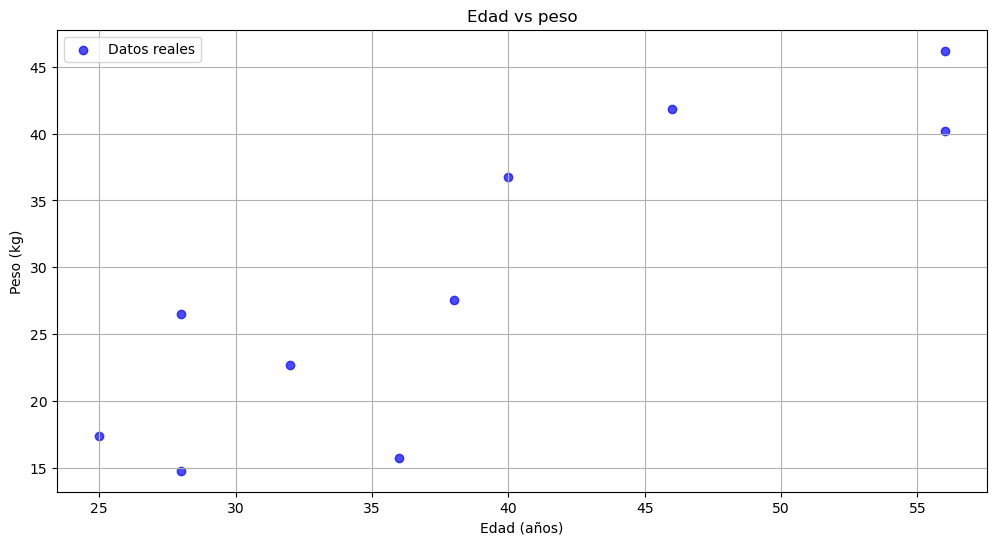

In [35]:

# Graficar
plt.figure(figsize=(12, 6))

# Gráfica de datos con ambas regresiones
plt.scatter(edad, peso, color='blue', label='Datos reales', alpha=0.7)
plt.title('Edad vs peso')
plt.xlabel('Edad (años)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()


# Comparando regresiones

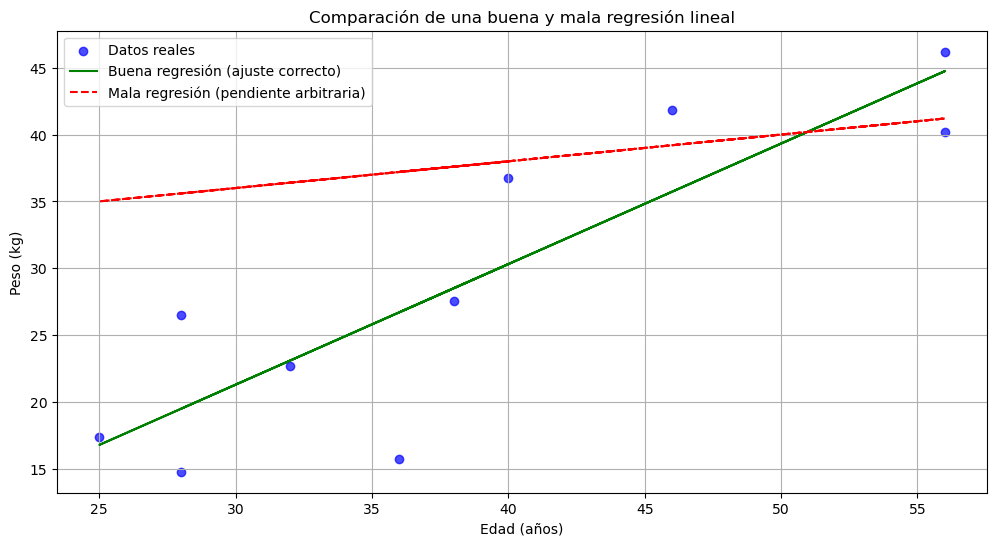

In [38]:

# Graficar
plt.figure(figsize=(12, 6))

# Gráfica de datos con ambas regresiones
plt.scatter(edad, peso, color='blue', label='Datos reales', alpha=0.7)
plt.plot(edad, peso_pred_bueno, color='green', label='Buena regresión (ajuste correcto)')
plt.plot(edad, peso_pred_malo, color='red', linestyle='--', label='Mala regresión (pendiente arbitraria)')
plt.title('Comparación de una buena y mala regresión lineal')
plt.xlabel('Edad (años)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# Crea un data frame con el real, prediccioens buenas y malas
df = pd.DataFrame({
    'peso':peso,
    'modelo_malo': peso_pred_malo,
    'modelo_bueno': peso_pred_bueno,
    'error_modelo_malo':peso-peso_pred_malo,
    'error_modelo_bueno':peso-peso_pred_bueno
})
df

,peso,modelo_malo,modelo_bueno,error_modelo_malo,error_modelo_bueno
0,46.195206,41.2,44.738588,4.995206,1.456618
1,41.852576,39.2,35.721805,2.652576,6.130771
2,22.695609,36.4,23.098309,-13.704391,-0.402699
3,17.374151,35.0,16.786561,-17.625849,0.587590
4,27.543099,37.6,28.508379,-10.056901,-0.965279
5,40.179586,41.2,44.738588,-1.020414,-4.559002
6,15.737255,37.2,26.705022,-21.462745,-10.967767
7,36.751848,38.0,30.311735,-1.248152,6.440113
8,26.482225,35.6,19.491595,-9.117775,6.990630
9,14.780620,35.6,19.491595,-20.819380,-4.710975


In [51]:
df.error_modelo_bueno.mean()

3.0198066269804257e-15

In [53]:
df.error_modelo_malo.mean()

-8.740782307328738

In [57]:
df = pd.DataFrame({
    'peso':peso,
    'modelo_malo': peso_pred_malo,
    'modelo_bueno': peso_pred_bueno,
    'error_modelo_malo':(peso-peso_pred_malo)**2,
    'error_modelo_bueno':(peso-peso_pred_bueno)**2
})


# Midiendo el error

In [59]:
df.error_modelo_bueno.mean()

29.47609587091773

In [63]:
df.error_modelo_malo.mean()

161.14393312486627

# Corrigiendo con el cuadrado

In [65]:
np.sqrt(df.error_modelo_bueno.mean())

5.429189246187476

In [69]:
np.sqrt(df.error_modelo_malo.mean())

12.694248033060733

# Descenso en gradiente 

Iteración 0: Pérdida = 959.37, w = 0.2432, b = 0.0058


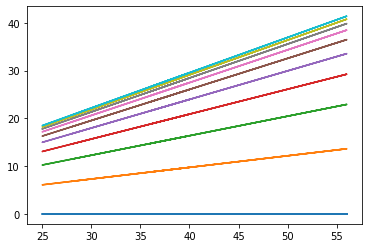

In [39]:
# Inicializar parámetros de la regresión lineal
w = 0  # Pendiente inicial
b = 0.0  # Intercepto inicial
tasa_aprendizaje = 0.0001  # Tasa de aprendizaje
iteraciones = 10  # Número de iteraciones

# Guardar valores de pérdida para graficar
perdidas = []
ws = []
# Gradiente descendente
for i in range(iteraciones):
    # Predicciones
    y_pred = w * edad + b
    plt.plot(edad, y_pred, label=i)
    plt.legend(loc='best)'

    # Calcular el error cuadrático medio (MSE)
    error = np.mean((peso - y_pred) ** 2)
    perdidas.append(error)

    # Calcular los gradientes
    gradiente_w = -2 * np.mean(edad * (peso - y_pred))  # Derivada parcial respecto a w
    gradiente_b = -2 * np.mean(peso - y_pred)          # Derivada parcial respecto a b

    # Actualizar los parámetros
    w = w - tasa_aprendizaje * gradiente_w
    b = b - tasa_aprendizaje * gradiente_b
    ws.append(w)
    
    # Opcional: Mostrar cada 100 iteraciones
    if i % 100 == 0:
        print(f"Iteración {i}: Pérdida = {error:.2f}, w = {w:.4f}, b = {b:.4f}")

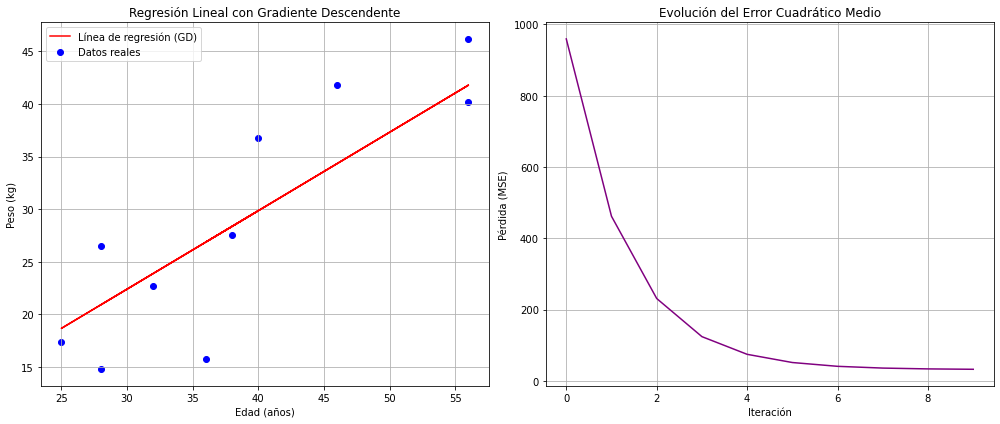

In [38]:

# Graficar los resultados
plt.figure(figsize=(14, 6))

# Gráfico 1: Ajuste del modelo a los datos
plt.subplot(1, 2, 1)
plt.scatter(edad, peso, color='blue', label='Datos reales')
plt.plot(edad, w * edad + b, color='red', label='Línea de regresión (GD)')
plt.title('Regresión Lineal con Gradiente Descendente')
plt.xlabel('Edad (años)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid()

# Gráfico 2: Evolución de la pérdida
plt.subplot(1, 2, 2)
plt.plot(range(iteraciones), perdidas, color='purple')
plt.title('Evolución del Error Cuadrático Medio')
plt.xlabel('Iteración')
plt.ylabel('Pérdida (MSE)')
plt.grid()

plt.tight_layout()
plt.show()

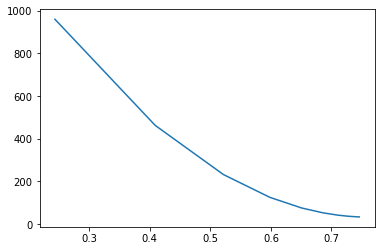

In [30]:
plt.plot(ws, perdidas)